In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from pandas import Series
data = pd.read_csv('data/real-daily-wages-in-pounds-engla.csv', header=0, parse_dates=[0], index_col=0)
data = data.astype(float)
data

,"Real daily wages in pounds, England. 1260 ? 1994"
Year,
1260,4.41
1261,4.63
1262,4.38
1263,4.52
1264,4.42
1265,4.64
1266,4.44
1267,5.15
1268,5.23


In [1]:
import statsmodels
statsmodels.__version__

'0.8.0.dev0+a218660'

### ARIMA

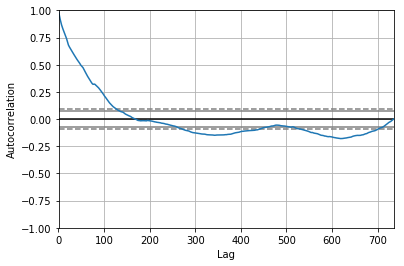

In [18]:
from pandas.tools.plotting import autocorrelation_plot
 
autocorrelation_plot(data)

c:\anaconda3\envs\spark\lib\site-packages\statsmodels-0.8.0-py3.5-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                             ARIMA Model Results                                              
Dep. Variable:     D.Real daily wages in pounds, England. 1260 ? 1994   No. Observations:                  734
Model:                                                ARIMA(10, 1, 0)   Log Likelihood                -751.404
Method:                                                       css-mle   S.D. of innovations              0.673
Date:                                                Wed, 17 May 2017   AIC                           1526.808
Time:                                                        13:43:23   BIC                           1581.991
Sample:                                                             1   HQIC                          1548.093
                                                                                                              
                                                                coef    std err          z      P>|z|      [0.02

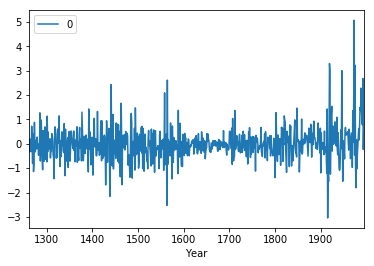

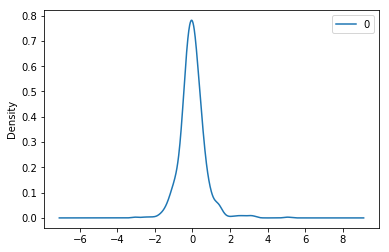

                0
count  734.000000
mean    -0.000093
std      0.673946
min     -3.041996
25%     -0.342418
50%     -0.031479
75%      0.317667
max      5.064106


In [3]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# fit model
model = ARIMA(data, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### Facebook Prophet

http://pystan.readthedocs.io/en/latest/windows.html

In [ ]:
from fbprophet import Prophet

df = pd.read_csv('data/monthly-milk-production-pounds-p.csv', header=0)
df.columns = ['ds','y']

m = Prophet()
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)